In [47]:
import numpy as np
from collections import OrderedDict
from __future__ import division
%matplotlib inline

# auROC calculation given motif and importance scores

### Load importance scores

In [48]:
#Scores for sequence number 6000 - 8000
impscore = np.load("/users/eprakash/newlsgkm/lsgkm/mytests/talgata/runs/talgata_t3_l6_k5_d1_g2.0_c10/ISM_importance_scores_TALGATA_task0.test.2000.npy")
impscore.shape

(2000, 200, 4)

In [49]:
#IG Scores for sequence number 6000 - 8000
igimpscore = np.load("/users/eprakash/newlsgkm/lsgkm/mytests/talgata/runs/talgata_t3_l6_k5_d1_g2.0_c10/IG_TALGATA_test.2000.npy")
igimpscore.shape

(2000, 200, 4)

###  Load sequences and motif info

In [50]:
import simdna.synthetic as synthetic
import gzip

data_filename = "sequences.simdata.gz"
data = synthetic.read_simdata_file(data_filename)
l = data.embeddings[6781]
for i in l:
    print(i.startPos, i.what.__dict__, len(i.what), i.what.getDescription())
    print(data.sequences[215])

(71, {'string': u'CTAGATAAGG', 'stringDescription': u'GATA_disc1'}, 10, u'GATA_disc1')
CGCCAACAGATGGTAACCGGCCTCATAGACCCTAGACATTGGTCATAGTGGGGCGCGACTGATTGTGAGGCTATGTTTAAACGGTCCCTCGGCCGCTACAGAGGCTAAGTAGGACAACTCTCGGAGGGAATACATAAACCAATTGGTGGCCGTATTCATTCACCCCAACAACCCAGGTGGCAACAGCTGGTACCCGACTG
(46, {'string': u'GGTGATAAGG', 'stringDescription': u'GATA_disc1'}, 10, u'GATA_disc1')
CGCCAACAGATGGTAACCGGCCTCATAGACCCTAGACATTGGTCATAGTGGGGCGCGACTGATTGTGAGGCTATGTTTAAACGGTCCCTCGGCCGCTACAGAGGCTAAGTAGGACAACTCTCGGAGGGAATACATAAACCAATTGGTGGCCGTATTCATTCACCCCAACAACCCAGGTGGCAACAGCTGGTACCCGACTG
(184, {'string': u'CCGAACAGATGGATGT', 'stringDescription': u'TAL1_known1'}, 16, u'TAL1_known1')
CGCCAACAGATGGTAACCGGCCTCATAGACCCTAGACATTGGTCATAGTGGGGCGCGACTGATTGTGAGGCTATGTTTAAACGGTCCCTCGGCCGCTACAGAGGCTAAGTAGGACAACTCTCGGAGGGAATACATAAACCAATTGGTGGCCGTATTCATTCACCCCAACAACCCAGGTGGCAACAGCTGGTACCCGACTG
(167, {'string': u'ACGAACAGATGGCCAG', 'stringDescription': u'TAL1_known1'}, 16, u'TAL1_known1')
CGCCAACAGATGGTAACCGGCCTCATAGACC

### Create ordered dictionary of sequence names to motif list 

In [51]:
seq2motiflist = OrderedDict()
i = 6000
seqnamelist = list()
for motiflist in data.embeddings[6000:8000]:
    seqname = "seq_" + str(i)
    seqnamelist.append(seqname)
    seq2motiflist[seqname] = list()
    for el in motiflist:
        d = dict()
        d['begin'] = el.startPos
        d['end'] = el.startPos + len(el.what)
        d['motif'] = el.what.getDescription()
        seq2motiflist[seqname].append(d)
    i = i+1
#print(seq2motiflist)

### Use importance score evaluator to get motif-sized-window scores and corresponding labels for auROC calc

In [52]:
from ssvmimp.impevaluator.motif_importance_score_evaluator import MotifImportanceScoreEvaluator

#print(seqnamelist)
seqnames = np.array(seqnamelist)
#print(seqnames)
print(seqnames.shape)
impscoreeval = MotifImportanceScoreEvaluator(seq2motiflist, seqnames, impscore)
print("Known motifs" + str(impscoreeval.get_known_motifs()))

print("Motif size for TAL1_known1  " + str(impscoreeval.get_motif_size('TAL1_known1')))
print("Motif size for GATA_disc1  " + str(impscoreeval.get_motif_size('GATA_disc1')))

(2000,)
Known motifs[u'GATA_disc1', u'TAL1_known1']
Motif size for TAL1_known1  16
Motif size for GATA_disc1  10


In [53]:
(scores, labels) = impscoreeval.get_motif_scores('TAL1_known1')
print("Scores shape: ", scores.shape)
print("Labels shape: ", labels.shape)

('Scores shape: ', (283872,))
('Labels shape: ', (283872,))


### Perform auROC and auPRC calculations using scores and labels

In [54]:
from sklearn import metrics

ismauroc = metrics.roc_auc_score(labels, scores)
ismauprc = metrics.average_precision_score(labels, scores)
print("auROC is: " + str(ismauroc))
print("auPRC is: " + str(ismauprc))

auROC is: 0.9266282467655568
auPRC is: 0.30957474976603494


In [55]:
proportion_positives = np.sum(labels>=0)/len(labels)
print(proportion_positives)

0.006059068876113178


In [56]:
ismfpr, ismtpr, ismrocthresholds = metrics.roc_curve(labels, scores, pos_label=1)
ismprecision, ismrecall, ismprcthresholds = metrics.precision_recall_curve(labels, scores)

### Do the same for IG

In [57]:
from ssvmimp.impevaluator.motif_importance_score_evaluator import MotifImportanceScoreEvaluator

#print(seqnamelist)
seqnames = np.array(seqnamelist)
#print(seqnames)
print(seqnames.shape)
impscoreeval = MotifImportanceScoreEvaluator(seq2motiflist, seqnames, igimpscore)
print("Known motifs" + str(impscoreeval.get_known_motifs()))

print("Motif size for TAL1_known1  " + str(impscoreeval.get_motif_size('TAL1_known1')))
print("Motif size for GATA_disc1  " + str(impscoreeval.get_motif_size('GATA_disc1')))

(2000,)
Known motifs[u'GATA_disc1', u'TAL1_known1']
Motif size for TAL1_known1  16
Motif size for GATA_disc1  10


In [58]:
(scores, labels) = impscoreeval.get_motif_scores('TAL1_known1')
print("Scores shape: ", scores.shape)
print("Labels shape: ", labels.shape)

('Scores shape: ', (283872,))
('Labels shape: ', (283872,))


In [59]:
igauroc = metrics.roc_auc_score(labels, scores)
igauprc = metrics.average_precision_score(labels, scores)
print("auROC is: " + str(igauroc))
print("auPRC is: " + str(igauprc))

auROC is: 0.9866475298321802
auPRC is: 0.45297678982329515


In [60]:
proportion_positives = np.sum(labels>=0)/len(labels)
print(proportion_positives)

0.006059068876113178


In [61]:
igfpr, igtpr, igrocthresholds = metrics.roc_curve(labels, scores, pos_label=1)
igprecision, igrecall, igprcthresholds = metrics.precision_recall_curve(labels, scores)

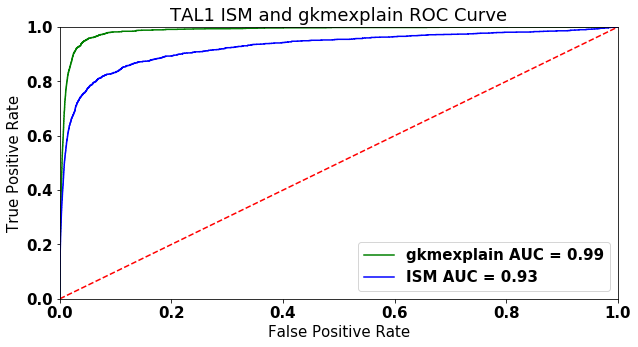

In [64]:
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,5))

plt.title('TAL1 ISM and gkmexplain ROC Curve')
plt.plot(igfpr, igtpr, 'g', label = 'gkmexplain AUC = %0.2f' % igauroc)
plt.plot(ismfpr, ismtpr, 'b', label = 'ISM AUC = %0.2f' % ismauroc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

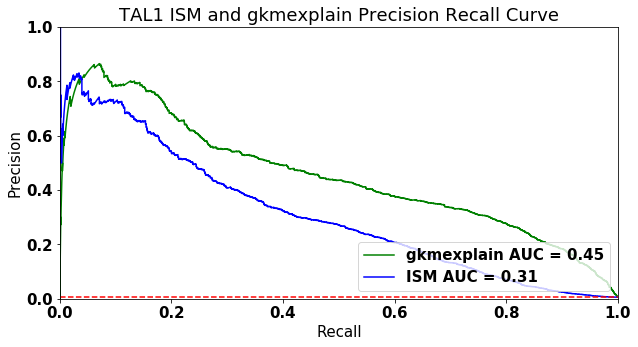

In [63]:
plt.figure(figsize=(10,5))

plt.title('TAL1 ISM and gkmexplain Precision Recall Curve')
plt.plot(igrecall, igprecision, 'g', label = 'gkmexplain AUC = %0.2f' % igauprc)
plt.plot(ismrecall, ismprecision, 'b', label = 'ISM AUC = %0.2f' % ismauprc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [proportion_positives, proportion_positives],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [65]:

from ssvmimp.impevaluator.motif_importance_score_evaluator import MotifImportanceScoreEvaluator

#print(seqnamelist)
seqnames = np.array(seqnamelist)
#print(seqnames)
print(seqnames.shape)
impscoreeval = MotifImportanceScoreEvaluator(seq2motiflist, seqnames, impscore)
print("Known motifs" + str(impscoreeval.get_known_motifs()))

print("Motif size for TAL1_known1  " + str(impscoreeval.get_motif_size('TAL1_known1')))
print("Motif size for GATA_disc1  " + str(impscoreeval.get_motif_size('GATA_disc1')))

(scores, labels) = impscoreeval.get_motif_scores('GATA_disc1')
print("Scores shape: ", scores.shape)
print("Labels shape: ", labels.shape)

from sklearn import metrics

ismauroc = metrics.roc_auc_score(labels, scores)
ismauprc = metrics.average_precision_score(labels, scores)
print("auROC is: " + str(ismauroc))
print("auPRC is: " + str(ismauprc))

proportion_positives = np.sum(labels>=0)/len(labels)
print(proportion_positives)

ismfpr, ismtpr, ismrocthresholds = metrics.roc_curve(labels, scores, pos_label=1)
ismprecision, ismrecall, ismprcthresholds = metrics.precision_recall_curve(labels, scores)


#print(seqnamelist)
seqnames = np.array(seqnamelist)
#print(seqnames)
print(seqnames.shape)
impscoreeval = MotifImportanceScoreEvaluator(seq2motiflist, seqnames, igimpscore)
print("Known motifs" + str(impscoreeval.get_known_motifs()))

print("Motif size for TAL1_known1  " + str(impscoreeval.get_motif_size('TAL1_known1')))
print("Motif size for GATA_disc1  " + str(impscoreeval.get_motif_size('GATA_disc1')))

(scores, labels) = impscoreeval.get_motif_scores('GATA_disc1')
print("Scores shape: ", scores.shape)
print("Labels shape: ", labels.shape)

igauroc = metrics.roc_auc_score(labels, scores)
igauprc = metrics.average_precision_score(labels, scores)
print("auROC is: " + str(igauroc))
print("auPRC is: " + str(igauprc))

proportion_positives = np.sum(labels>=0)/len(labels)
print(proportion_positives)

igfpr, igtpr, igrocthresholds = metrics.roc_curve(labels, scores, pos_label=1)
igprecision, igrecall, igprcthresholds = metrics.precision_recall_curve(labels, scores)

(2000,)
Known motifs[u'GATA_disc1', u'TAL1_known1']
Motif size for TAL1_known1  16
Motif size for GATA_disc1  10
('Scores shape: ', (311182,))
('Labels shape: ', (311182,))
auROC is: 0.9695125757648693
auPRC is: 0.44998498982397617
0.005565874632851514
(2000,)
Known motifs[u'GATA_disc1', u'TAL1_known1']
Motif size for TAL1_known1  16
Motif size for GATA_disc1  10
('Scores shape: ', (311182,))
('Labels shape: ', (311182,))
auROC is: 0.9875709408818523
auPRC is: 0.5688745008401609
0.005565874632851514


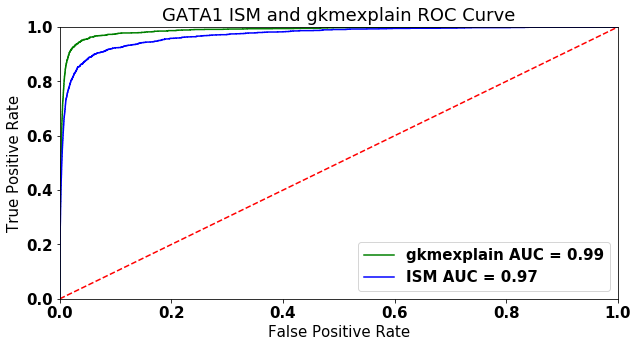

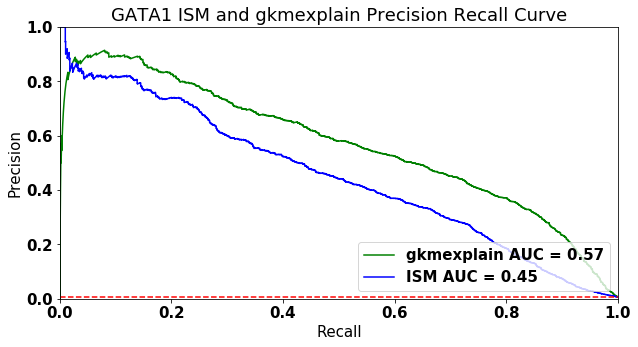

In [66]:
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,5))

plt.title('GATA1 ISM and gkmexplain ROC Curve')
plt.plot(igfpr, igtpr, 'g', label = 'gkmexplain AUC = %0.2f' % igauroc)
plt.plot(ismfpr, ismtpr, 'b', label = 'ISM AUC = %0.2f' % ismauroc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure(figsize=(10,5))

plt.title('GATA1 ISM and gkmexplain Precision Recall Curve')
plt.plot(igrecall, igprecision, 'g', label = 'gkmexplain AUC = %0.2f' % igauprc)
plt.plot(ismrecall, ismprecision, 'b', label = 'ISM AUC = %0.2f' % ismauprc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [proportion_positives, proportion_positives],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()